In [ ]:
from astropy.table import Table
import astropy.io.fits as fits
import numpy as np

# loads the catalog
cat_p = Table.read('/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/classifications.csv')
#cat_d = Table.read("D:\\GLC_dataset\\train\\classifications.csv")
ims = np.zeros((20000, 1, 101, 101))

file_p1 = '/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.0/Public/Band1/imageEUC_VIS-'
file_p2 =  '/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.1/Public/Band1/imageEUC_VIS-'
file_d1 = "D:\\GLC_dataset\\train\\Data.0\\Data.0\\Private\Band1\\NoLensImage\\imageEUC_VIS-"
file_d2 = "D:\\GLC_dataset\\train\\Data.1\\Data.1\\Private\Band1\\NoLensImage\\imageEUC_VIS-"
# loads the images
'''for i, id in enumerate(cat_d['ID']):
  try:
    ims = fits.open(file_d1+str(id)+'.fits')
    data = ims[0].data
    d_array[i] = np.array(data)
  except IOError:
    ims = fits.open(file_d2+str(id)+'.fits')
    data = ims[0].data
    d_array[i] = np.array(data)'''

for i, id in enumerate(cat_p['ID']):
  try:
    ims[i][0] = fits.getdata(file_p1+str(id)+'.fits')
  except IOError:
    ims[i][0] = fits.getdata(file_p2+str(id)+'.fits')

# Concatenate images to catalog
cat_p['image'] = ims

cat_p.write('catalogs.hdf5', append=True)

In [ ]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

d = Table.read('/content/drive/MyDrive/catalogs.hdf5')

In [ ]:
x = np.array(d['image'][:16000]).reshape((-1, 101, 101, 1))
y = np.array(d['is_lens'][:16000]).reshape((-1, 1))

x_test = np.array(d['image'][16000:]).reshape((-1, 101, 101, 1))
y_test = np.array(d['is_lens'][16000:]).reshape((-1, 1))

In [ ]:
vmin = -1e-9
vmax = 1e-9
scale = 100

mask = np.where(x == 100)
mask_test = np.where(x_test == 100)

x[mask] = 0
x_test[mask_test] = 0

x = np.clip(x, vmin, vmax)/vmax * scale
x_test = np.clip(x_test, vmin, vmax)/vmax * scale

x[mask] = 0
x_test[mask_test] = 0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

initializer = tf.keras.initializers.HeNormal()

model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation=None, padding='same', kernel_initializer=initializer, input_shape = (101,101,1)))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.Conv2D(64, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.Conv2D(128, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.Conv2D(256, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.Conv2D(256, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.Conv2D(512, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.Conv2D(512, (3,3), activation=None, kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.ELU())
model.add(layers.MaxPooling2D(2,2))

#model.add(layers.Conv2D(512, (2,2), activation=None, kernel_initializer=initializer))
#model.add(layers.BatchNormalization())
#model.add(layers.Conv2D(512, (2,2), activation=None, kernel_initializer=initializer))
#model.add(layers.BatchNormalization())
#model.add(layers.Conv2D(512, (2,2), activation=None, kernel_initializer=initializer))
#model.add(layers.BatchNormalization())
#model.add(layers.Conv2D(512, (2,2), activation=None, kernel_initializer=initializer))
#model.add(layers.MaxPooling2D(2,2))
#model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation=None, kernel_initializer=initializer))
model.add(layers.ELU())
model.add(layers.Dropout(0.50))
model.add(layers.Dense(2048, activation=None, kernel_initializer=initializer))
model.add(layers.ELU())
model.add(layers.Dropout(0.50))
model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 101, 101, 64)      640       
                                                                 
 batch_normalization_10 (Bat  (None, 101, 101, 64)     256       
 chNormalization)                                                
                                                                 
 elu_12 (ELU)                (None, 101, 101, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 99, 99, 64)        36928     
                                                                 
 batch_normalization_11 (Bat  (None, 99, 99, 64)       256       
 chNormalization)                                                
                                                                 
 elu_13 (ELU)                (None, 99, 99, 64)       

In [1]:
!pip install tfa-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x, y, epochs=10)

Epoch 1/10
500/500 [==============================] - 43s 84ms/step - loss: 0.2629 - accuracy: 0.8835
Epoch 2/10
500/500 [==============================] - 43s 86ms/step - loss: 0.1925 - accuracy: 0.9197
Epoch 3/10
500/500 [==============================] - 41s 83ms/step - loss: 0.1860 - accuracy: 0.9243
Epoch 4/10
500/500 [==============================] - 41s 82ms/step - loss: 0.1439 - accuracy: 0.9389
Epoch 5/10
500/500 [==============================] - 41s 82ms/step - loss: 0.1402 - accuracy: 0.9419
Epoch 6/10
500/500 [==============================] - 41s 82ms/step - loss: 0.1577 - accuracy: 0.9375
Epoch 7/10
500/500 [==============================] - 41s 82ms/step - loss: 0.1255 - accuracy: 0.9478
Epoch 8/10
500/500 [==============================] - 42s 84ms/step - loss: 0.1355 - accuracy: 0.9458
Epoch 9/10
500/500 [==============================] - 42s 84ms/step - loss: 0.1078 - accuracy: 0.9553
Epoch 10/10
500/500 [==============================] - 41s 83ms/step - loss: 0.108

In [ ]:
hist_t = model.evaluate(x_test,y_test)

hist_t

125/125 [==============================] - 4s 29ms/step - loss: 11.7745 - accuracy: 0.5332


[11.774458885192871, 0.5332499742507935]

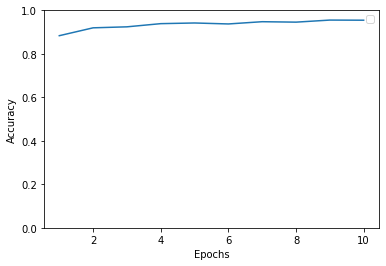

In [ ]:
import matplotlib.pyplot as plt

v_y = np.array(hist.history['accuracy'])
v_x = np.array(list(range(1, len(v_y)+1)))
#v_ty = np.array(hist_t[1]*v_x)
plt.ylim(0.0, 1.0)

plt.plot(v_x, v_y)
#plt.plot(v_x, v_ty)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()